# Leer datos

Cargamos librerías

In [ ]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import cluster
from sklearn import datasets
from sklearn import manifold

Cargamos el dataset de vinos

In [ ]:
datos = datasets.load_wine()

In [ ]:
datos.data.shape

(178, 13)

In [ ]:
datos.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
X = pd.DataFrame(datos.data, columns=datos.feature_names)
X


alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0      14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1      13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3      14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4      13.24        2.59  2.87  ...  1.04                          2.93    735.0
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0
176    13.17        2.59  2.37  ...  0.60                          1.62    840.0
177    14.13        4.10  2.74  ...  0.61                          1.60    560.0

[178 rows x 13 columns]

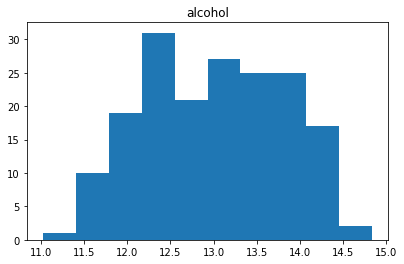

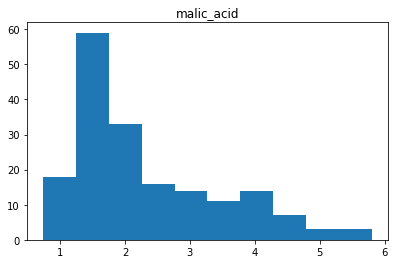

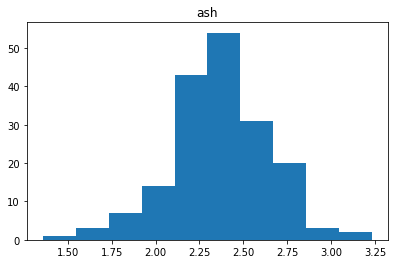

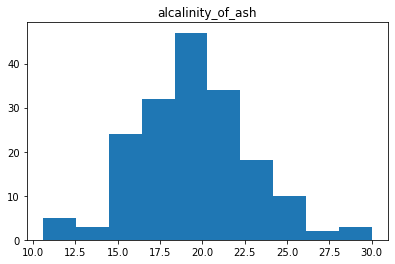

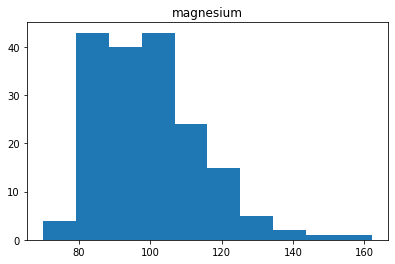

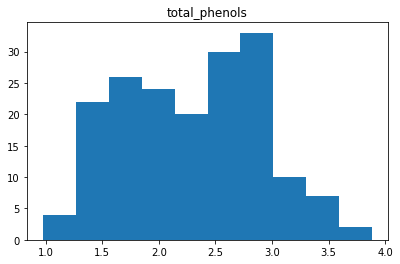

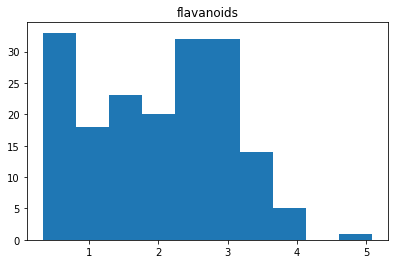

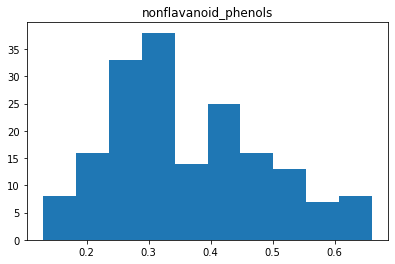

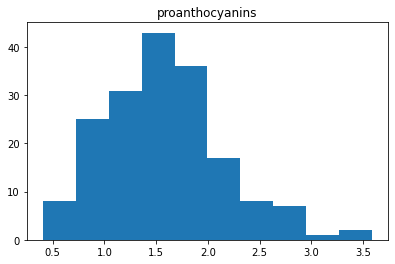

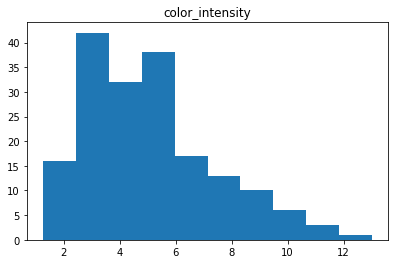

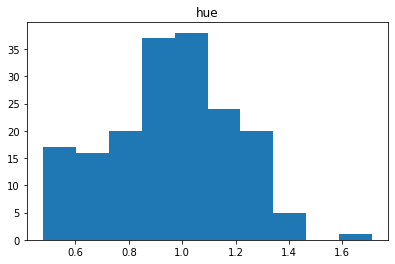

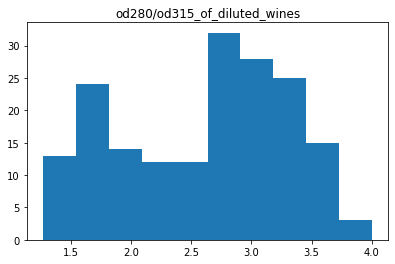

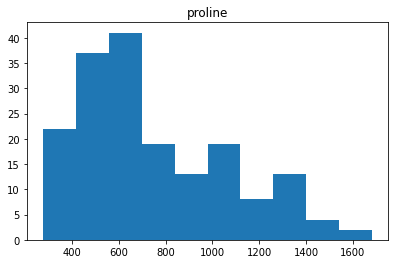

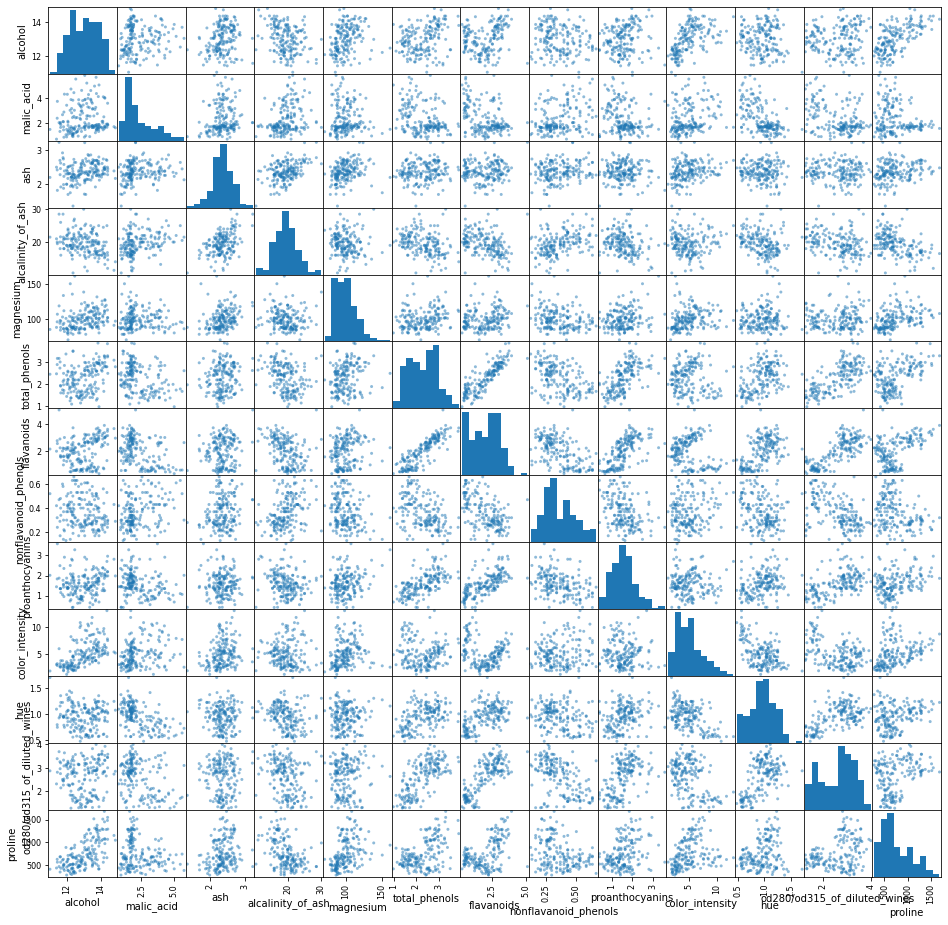

In [ ]:
for name in datos.feature_names:
    pyplot.figure(figsize=(1.618 * 4, 4))
    pyplot.hist(X[name])
    pyplot.title(name)
    pyplot.show()


pd.plotting.scatter_matrix(X, figsize=(16, 16))
pyplot.show()

# K-means

In [ ]:
num_clusters_k = 4
mo1 = cluster.KMeans(n_clusters=num_clusters_k)
mo1.fit(X)

KMeans(n_clusters=4)

In [ ]:
mo1.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

¿A qué cluster pertenece cada dato (vino)?

In [ ]:
mo1.labels_

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 2,
       1, 1, 2, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

¿Cómo se distribuyen los valores de las variables entre los miembros de cada cluster?

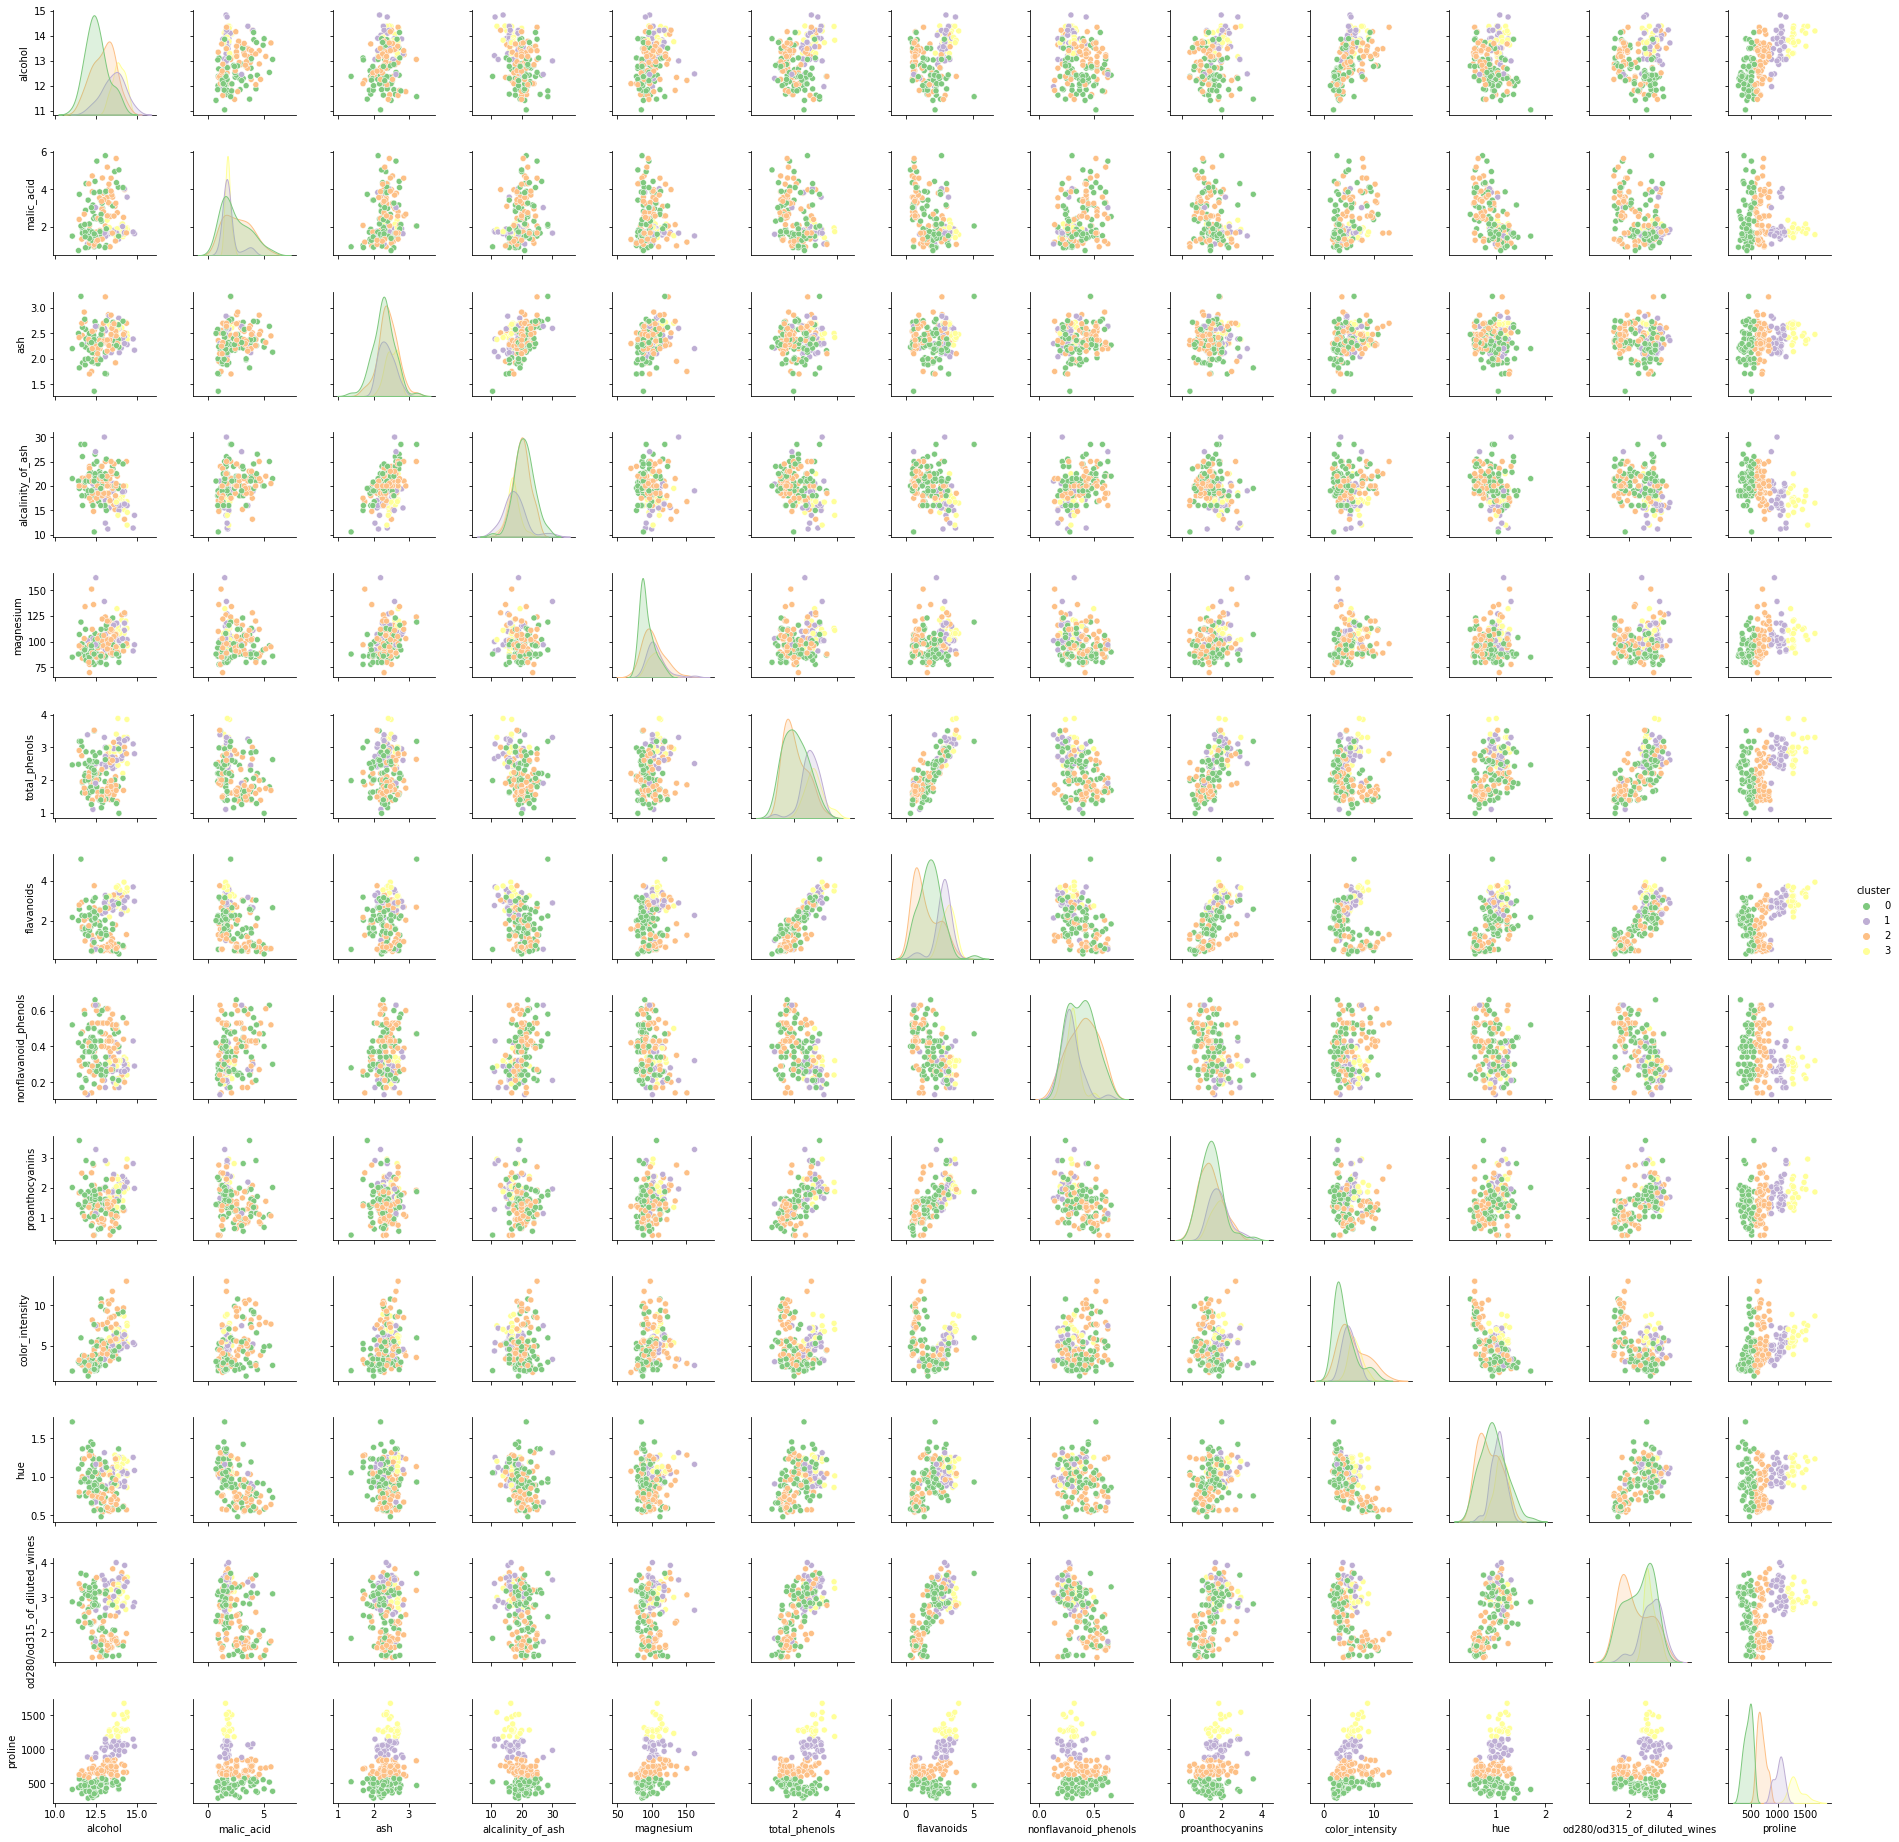

In [ ]:
Clusters = pd.concat([X,pd.Series(mo1.labels_, name='cluster')], axis=1)
sns.pairplot(Clusters, hue='cluster', vars=X.columns, height=2, palette="Accent")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


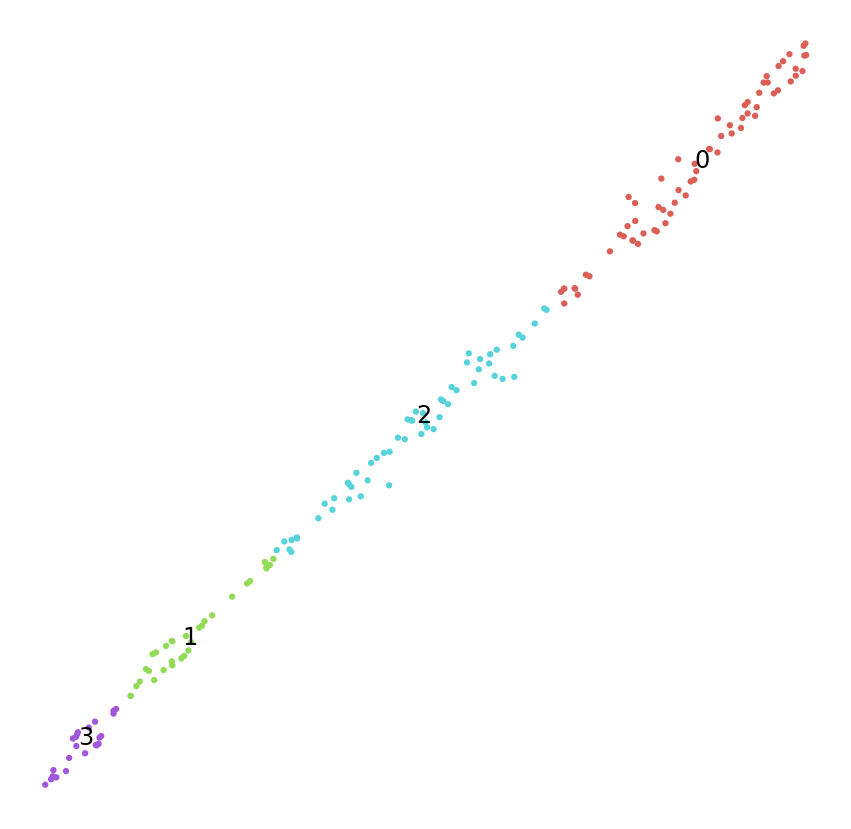

In [ ]:
tsne_X = visualization_tsne = manifold.TSNE().fit_transform(X)
pyplot.figure(figsize=(15, 15))
ax = pyplot.subplot(aspect='equal')
palette = np.array(sns.color_palette("hls", num_clusters_k))
sc = ax.scatter(tsne_X[:, 0], tsne_X[:, 1], lw=0, s=40, c=palette[mo1.labels_.astype(int)])
pyplot.xlim((-25, 25))
pyplot.ylim((-25, 25))
ax.axis('off')
ax.axis('tight')
for i in range(num_clusters_k):
    xtext, ytext = np.median(tsne_X[mo1.labels_ == i, :], axis=0)
    ax.text(xtext, ytext, str(i), fontsize=24)
pyplot.show()

# Mezcla de Gaussianas

In [ ]:
from sklearn.mixture import GaussianMixture
mo2 = GaussianMixture(n_components=4)
mo2.fit(X)

GaussianMixture(n_components=4)

In [ ]:
mo2.get_params()


{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 4,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

¿Cómo predecir las etiquetas de un conjunto de datos?

In [ ]:
pred_labels = mo2.predict(X)
pred_labels

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 3, 3, 2,
       3, 1, 1, 1, 0, 3, 3, 0, 0, 3, 3, 1, 0, 3, 3, 2, 1, 3, 1, 1, 3, 1,
       1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1])

¿Si queremos ver las probabilidades para cada dato?

In [ ]:
mo2.predict_proba(X)

array([[9.98943532e-001, 5.66665482e-014, 1.05646791e-003,
        1.08836501e-077],
       [2.24988505e-027, 1.60280558e-011, 1.00000000e+000,
        3.40338294e-051],
       [7.60741407e-036, 4.58854084e-012, 1.00000000e+000,
        2.14932376e-060],
       [1.07615971e-046, 1.59526423e-028, 1.00000000e+000,
        2.49342769e-111],
       [9.99938350e-001, 6.10901192e-005, 5.60358468e-007,
        7.92743511e-020],
       [8.20484334e-044, 1.42865935e-027, 1.00000000e+000,
        4.87736848e-090],
       [1.54813208e-014, 9.33610076e-020, 1.00000000e+000,
        2.65230194e-098],
       [4.35721758e-027, 3.50613221e-019, 1.00000000e+000,
        4.17471687e-097],
       [7.69066760e-015, 2.67077155e-013, 1.00000000e+000,
        6.51039651e-040],
       [6.17405104e-007, 1.45646520e-010, 9.99999382e-001,
        3.79361925e-046],
       [1.70287674e-024, 1.97237597e-026, 1.00000000e+000,
        1.10082139e-093],
       [3.47540294e-028, 3.71403283e-017, 1.00000000e+000,
      

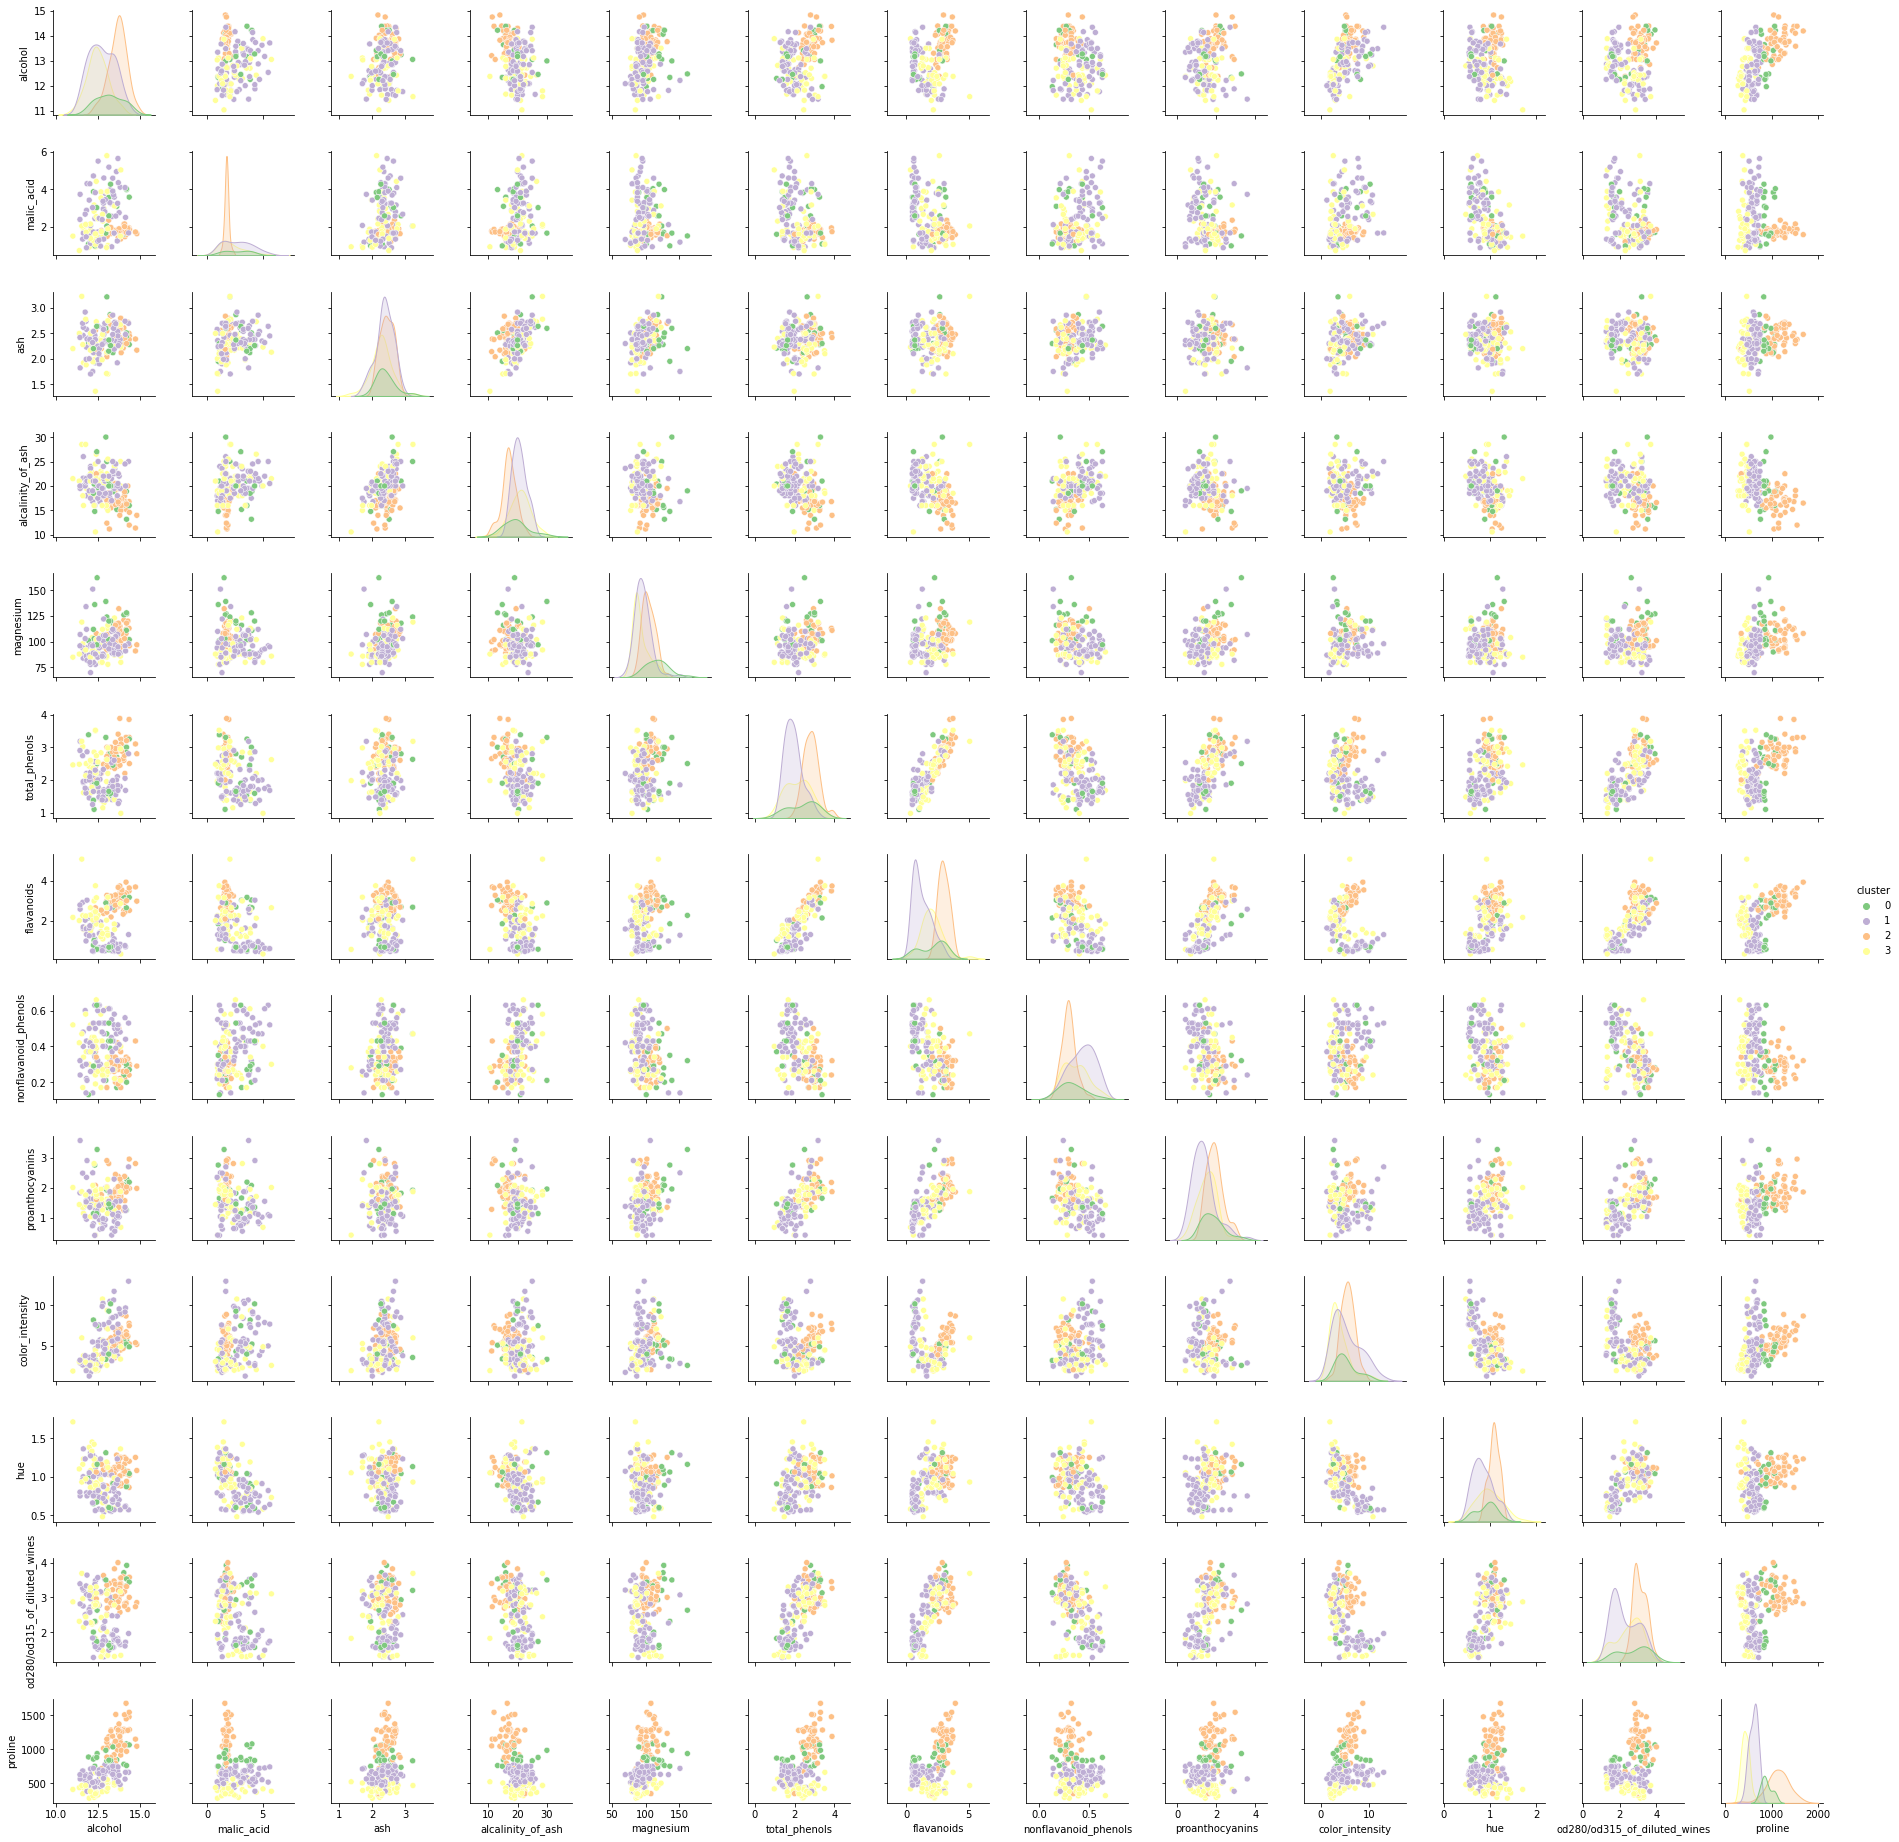

In [ ]:
Clusters = pd.concat([X,pd.Series(mo2.predict(X), name='cluster')], axis=1)
sns.pairplot(Clusters, hue='cluster', vars=X.columns, height=2, palette="Accent")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


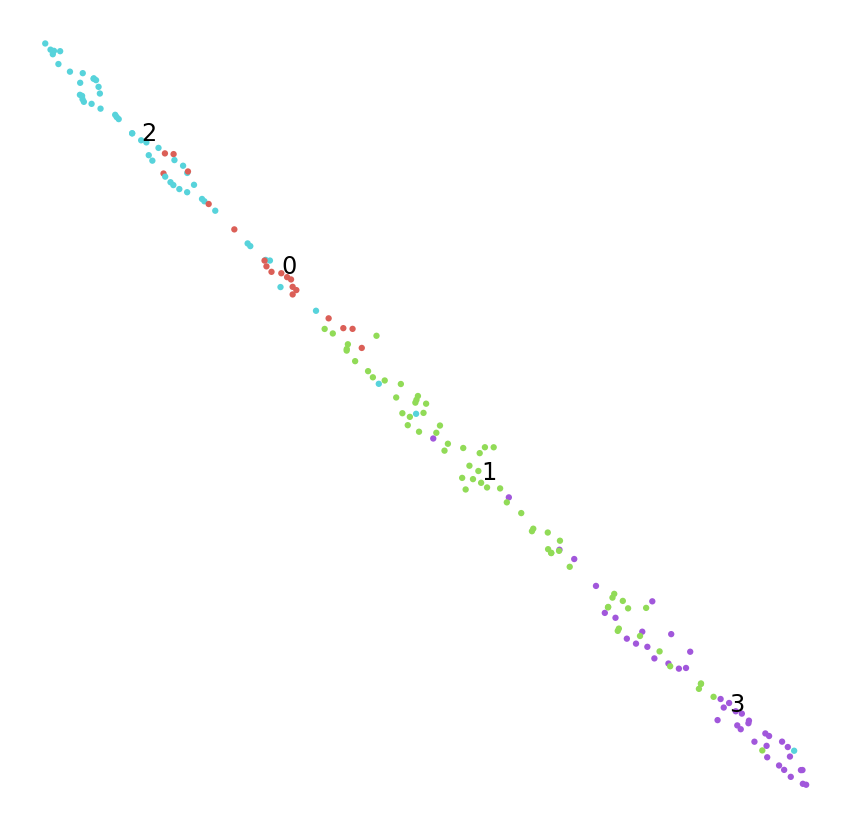

In [ ]:
tsne_X = visualization_tsne = manifold.TSNE().fit_transform(X)
pyplot.figure(figsize=(15, 15))
ax = pyplot.subplot(aspect='equal')
palette = np.array(sns.color_palette("hls", num_clusters_k))
sc = ax.scatter(tsne_X[:, 0], tsne_X[:, 1], lw=0, s=40, c=palette[mo2.predict(X).astype(int)])
pyplot.xlim((-25, 25))
pyplot.ylim((-25, 25))
ax.axis('off')
ax.axis('tight')
for i in range(num_clusters_k):
    xtext, ytext = np.median(tsne_X[mo2.predict(X) == i, :], axis=0)
    ax.text(xtext, ytext, str(i), fontsize=24)
pyplot.show()

In [ ]:
mo1.labels_

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 2,
       1, 1, 2, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [ ]:
pred_labels

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 3, 3, 2,
       3, 1, 1, 1, 0, 3, 3, 0, 0, 3, 3, 1, 0, 3, 3, 2, 1, 3, 1, 1, 3, 1,
       1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1])